# Adaline: Atividade Prática 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [2]:
class Adaline(object):
    def __init__(self, epochs = 100, rate = 0.1, error_max = 0.01):
        self.epochs = epochs
        self.rate = rate
        self.error_max = error_max
    
    def fit(self, X, y):
        self.weight_ = np.random.uniform(0, 1, X.shape[1] + 1) 
        it, self.error_ = 0,0.
        self.cost_=[]
        self.weight_list_ = self.weight_

        while it<self.epochs:
            self.error_ = 0
            eqm_previous = self.lms(X, y, self.weight_)

            for i in range(X.shape[0]):
                
                output = self.net_input(X[i])
                update = self.rate*(y[i]-output)
                
                self.weight_[0] += update
                self.weight_[1:] += update*X[i]
                
            it += 1
            eqm_current = self.lms(X, y, self.weight_)
            self.weight_list_ = np.vstack([self.weight_list_, self.weight_])
            self.error_ = abs(eqm_current - eqm_previous)
            self.cost_.append(self.error_)

            if(self.error_<self.error_max):      
                break

    def lms(self, X, y, weight_):
        eqm = 0
        p = X.shape[0]
        
        for i in range(p):
            u = self.net_input(X[i])
            eqm += (y[i] - u)**2
        
        eqm /= p
        return eqm      
        
    def net_input(self, X):  
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def activation_function(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def predict(self, X_test):        
        return np.where(self.net_input(X_test) >= 0.0, 1, -1)

**You can check the colormap options [here](https://github.com/hsneto/redes_neurais/blob/master/dataset/other/colormaps.png)**

In [3]:
def classifier_plot(classifier, option='cost', cm=None):
    if (option == 'cost'):
        plt.plot(range(len(classifier.cost_)), classifier.cost_)
        plt.title('Error curve:')
        plt.xlabel('epochs')
        plt.ylabel('error')
        plt.show()
        
    elif (option == 'weight'):
        num_plots = classifier.weight_list_.shape[0]
        colormap = plt.cm.Purples
        plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
        for i in range(classifier.weight_list_.shape[0]):
            plt.plot([0,-classifier.weight_list_[i,0]/classifier.weight_list_[i,1]],[-classifier.weight_list_[i,0]/classifier.weight_list_[i,2],0])
        plt.title('Weight lines:')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()
        
    elif (option == 'confusion_matrix'):
        df_cm = pd.DataFrame(cm, 
                             range(cm.shape[0]),
                             range(cm.shape[1]))
        sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    
    else:
        print('Invalid option') 

In [4]:
# Lendo o conjunto de treinamento e de teste:
train_set = pd.read_csv('../dataset/atividade_1/oleo_treino.csv', header=None)
test_set = pd.read_csv('../dataset/atividade_1/oleo_teste.csv', header=None)

X_train = train_set.iloc[:,:-1].values
y_train = train_set.iloc[:,-1].values
X_test = test_set.iloc[:,:].values

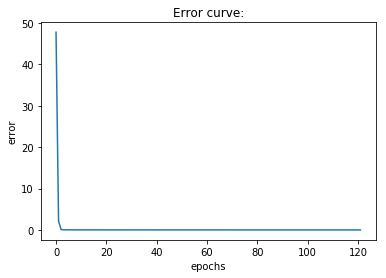

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if sys.path[0] == '':


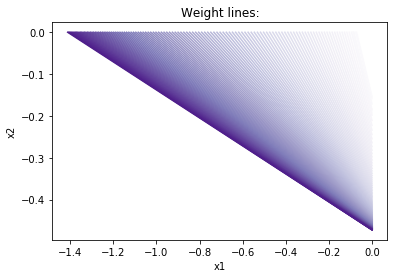

Accuracy: 86.66666666666667%


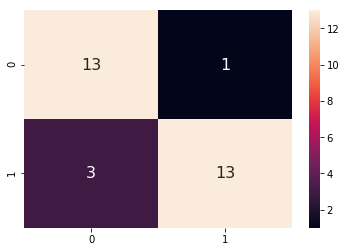

In [5]:
classifier = Adaline(epochs=1000, rate=0.001, error_max=0.001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

classifier_plot(classifier)
classifier_plot(classifier, option='weight')
classifier_plot(classifier, option='confusion_matrix', cm=cm)

accuracy = np.trace(cm)/np.sum(cm)
print("Accuracy: \033[1;32m{}%".format(100*accuracy)) if accuracy==1. \
else print("Accuracy: \033[1;31m{}%".format(100*accuracy))

In [6]:
y_pred = classifier.predict(X_test)
y_pred

array([-1,  1,  1,  1,  1,  1, -1,  1, -1, -1])